**Larva Classification : Zophobas Morio and Tenebrio Molitor**

Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# import *
import os
import math
import random
import shutil

# import as
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf

#from import
from tensorflow import keras
from tensorflow.keras import layers

#directory settings
BASE_DIR = '/content/drive/MyDrive/larva'
names = [  "Zophobas","Tenebrio" ]

#settings for directory of training, validation, and testing
try:
  shutil.rmtree(BASE_DIR + '/train')
  shutil.rmtree(BASE_DIR + '/val')
  shutil.rmtree(BASE_DIR + '/test')
except OSError as e:
  print("Error From e.strerror: %s" % (e.strerror))

tf.random.set_seed(42)

# Restructure the folder 
if not os.path.isdir(BASE_DIR + '/train/'):
    for name in names:
        os.makedirs(BASE_DIR + '/train/' + name)
        os.makedirs(BASE_DIR + '/val/' + name)
        os.makedirs(BASE_DIR + '/test/' + name)

orig_folders = ["/Zophobas/","/Tenebrio/" ]
for folder_idx, folder in enumerate(orig_folders):
    files = os.listdir(BASE_DIR + folder)
    number_of_images = len([name for name in files])
    #set the proportion of images, all must equal to 1.0
    n_train = 0.6 * number_of_images
    n_test = 0.2 * number_of_images
    n_valid = 0.2 * number_of_images
    print(number_of_images, n_train, n_valid, n_test)
    for idx, file in enumerate(files):
        file_name = BASE_DIR + folder + file
        if idx < n_train:
            shutil.copy(file_name, BASE_DIR + "/train/" + names[folder_idx])
        elif idx < n_train + n_valid:
            shutil.copy(file_name, BASE_DIR + "/val/" + names[folder_idx])
        else:
            shutil.copy(file_name, BASE_DIR + "/test/" + names[folder_idx])

vgg_model = tf.keras.applications.vgg19.VGG19()
print(type(vgg_model))
vgg_model.summary()


# change to Sequential model
model = keras.models.Sequential()
for layer in vgg_model.layers[0:-1]:
    model.add(layer)
    
    
model.summary()

# we set trainable=False for all layers, no need retraining
for layer in model.layers:
    layer.trainable = False

# this is classification layer
model.add(layers.Dense(2))

model.summary()



Mounted at /content/drive
320 192.0 64.0 64.0
320 192.0 64.0 64.0
574726144/574710816 [==============================] - 5s 0us/step
<class 'keras.engine.functional.Functional'>
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (C

**Loading dataset**

In [ ]:
# call loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

# get the preprocessing function of this model
preprocess_input = tf.keras.applications.vgg16.preprocess_input

# Generate batches of tensor image data with real-time data augmentation.

train_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
valid_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_batches = train_gen.flow_from_directory(
    '/content/drive/MyDrive/larva/train',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=8,
    shuffle=True,
    seed = 42,
    color_mode="rgb",
    classes=names   
)

val_batches = valid_gen.flow_from_directory(
    '/content/drive/MyDrive/larva/val',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=8,
    shuffle=True,
    seed = 42,
    color_mode="rgb",
    classes=names
)

test_batches = test_gen.flow_from_directory(
    '/content/drive/MyDrive/larva/test',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=8, 
    shuffle=False,
    color_mode="rgb",
    classes=names
)


Found 384 images belonging to 2 classes.
Found 128 images belonging to 2 classes.
Found 128 images belonging to 2 classes.


**processing**

In [ ]:
epochs = 100#

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=2
)

model.fit(train_batches, validation_data=val_batches,
          callbacks=[early_stopping],
          epochs=epochs, verbose=1)

model.evaluate(test_batches, verbose=2)



Epoch 1/100
48/48 [==============================] - 322s 7s/step - loss: 0.3045 - accuracy: 0.8724 - val_loss: 0.1694 - val_accuracy: 0.9297
Epoch 2/100
48/48 [==============================] - 320s 7s/step - loss: 0.0777 - accuracy: 0.9740 - val_loss: 0.0760 - val_accuracy: 0.9688
Epoch 3/100
48/48 [==============================] - 320s 7s/step - loss: 0.0349 - accuracy: 0.9974 - val_loss: 0.0958 - val_accuracy: 0.9766
Epoch 4/100
48/48 [==============================] - 320s 7s/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.0749 - val_accuracy: 0.9609
Epoch 5/100
48/48 [==============================] - 321s 7s/step - loss: 0.0212 - accuracy: 0.9948 - val_loss: 0.0695 - val_accuracy: 0.9766
Epoch 6/100
48/48 [==============================] - 321s 7s/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.0810 - val_accuracy: 0.9766
Epoch 7/100
48/48 [==============================] - 321s 7s/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0696 - val_accuracy: 0.9766
Epoch 

[0.0923558846116066, 0.96875]

**Reporting**

Summary:
                  precision    recall  f1-score   support

  Zophobus Morio       1.00      0.94      0.97        64
Tenebrio Molitor       0.94      1.00      0.97        64

        accuracy                           0.97       128
       macro avg       0.97      0.97      0.97       128
    weighted avg       0.97      0.97      0.97       128



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

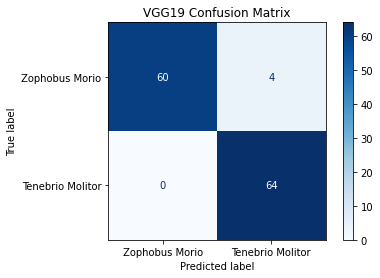

In [ ]:
# PREDICTION Report

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Confution Matrix and Classification Report
Y_pred = model.predict(test_batches)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_batches.classes, y_pred)

target_names = ['Zophobus Morio','Tenebrio Molitor'] 

print('Summary:')
print(classification_report(test_batches.classes, y_pred, target_names=target_names))

#Download the results
labels = (train_batches.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]

filenames=test_batches.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

from google.colab import files
files.download("results.csv")



#Confussion Matrix 
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=target_names)
# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot(cmap=plt.cm.Blues)
plt.title("VGG19 Confusion Matrix")
plt.show()